# Street Fighter Tutorial
This notebook accompanies the YouTube tutorial on <a href='https://www.youtube.com/c/NicholasRenotte'>Nicholas Renotte</a>

# Setup StreetFighter

In [1]:
! pip install gym gym-retro

In [2]:
# Import retro to play Street Fighter using a ROM
import retro
# Import time to slow down game
import time

In [3]:
# See the different retro games
retro.data.list_games()

['1942-Nes',
 '1943-Nes',
 '3NinjasKickBack-Genesis',
 '8Eyes-Nes',
 'AaahhRealMonsters-Genesis',
 'AbadoxTheDeadlyInnerWar-Nes',
 'AcceleBrid-Snes',
 'ActRaiser2-Snes',
 'ActionPachio-Snes',
 'AddamsFamily-GameBoy',
 'AddamsFamily-Genesis',
 'AddamsFamily-Nes',
 'AddamsFamily-Sms',
 'AddamsFamily-Snes',
 'AddamsFamilyPugsleysScavengerHunt-Nes',
 'AddamsFamilyPugsleysScavengerHunt-Snes',
 'AdvancedBusterhawkGleylancer-Genesis',
 'Adventure-Atari2600',
 'AdventureIsland-GameBoy',
 'AdventureIsland3-Nes',
 'AdventureIslandII-Nes',
 'AdventuresOfBatmanAndRobin-Genesis',
 'AdventuresOfBayouBilly-Nes',
 'AdventuresOfDinoRiki-Nes',
 'AdventuresOfDrFranken-Snes',
 'AdventuresOfKidKleets-Snes',
 'AdventuresOfMightyMax-Genesis',
 'AdventuresOfMightyMax-Snes',
 'AdventuresOfRockyAndBullwinkleAndFriends-Genesis',
 'AdventuresOfRockyAndBullwinkleAndFriends-Nes',
 'AdventuresOfRockyAndBullwinkleAndFriends-Snes',
 'AdventuresOfStarSaver-GameBoy',
 'AdventuresOfYogiBear-Snes',
 'AeroFighters-Snes',
 

In [4]:
! python -m retro.import . # Run this from the roms folder, or where you have your game roms 

Importing StreetFighterIISpecialChampionEdition-Genesis
Importing StreetFighterIISpecialChampionEdition-Genesis
Importing StreetFighterIISpecialChampionEdition-Genesis
Imported 3 games


In [5]:
# Starts up the game environment
env = retro.make(game='StreetFighterIISpecialChampionEdition-Genesis')

c:\Users\user\AppData\Local\Programs\Python\Python38\lib\site-packages\gym\utils\seeding.py:159: DeprecationWarning: WARN: Function `hash_seed(seed, max_bytes)` is marked as deprecated and will be removed in the future. 
  deprecation(
c:\Users\user\AppData\Local\Programs\Python\Python38\lib\site-packages\gym\utils\seeding.py:203: DeprecationWarning: WARN: Function `_bigint_from_bytes(bytes)` is marked as deprecated and will be removed in the future. 
  deprecation(


In [6]:
# Closes the game environment - important given we can only run one at a time 
env.close()

In [7]:
# Sample the observation space
env.observation_space

Box(0, 255, (200, 256, 3), uint8)

In [8]:
# Sample the actions that are avaialble - MultiBinary
env.action_space.sample()

array([1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1], dtype=int8)

In [9]:
! pip install --upgrade pyvirtualdisplay


In [10]:
import pyglet
import cv2
import retro
import numpy as np
import time

# Create the Street Fighter environment
env = retro.make(game='StreetFighterIISpecialChampionEdition-Genesis')

# Set up the rendering window
window = pyglet.window.Window(width=800, height=600, display=None)

@window.event
def on_draw():
    window.clear()  # Clear the window before rendering
    env.render()
    window.flip()

# Reset game to starting state
obs = env.reset()

# Set flag to false
done = False

while not done:
    window.dispatch_events()

    # Perform your environment step
    obs, reward, done, info = env.step(env.action_space.sample())

    # Convert the observation frame to RGB for display
    rgb_obs = cv2.cvtColor(obs, cv2.COLOR_BGR2RGB)

    # Flip the image vertically
    rgb_obs_flipped = np.flipud(rgb_obs)

    # Display the observation frame using pyglet
    image_data = rgb_obs_flipped.flatten().tobytes()
    image = pyglet.image.ImageData(rgb_obs_flipped.shape[1], rgb_obs_flipped.shape[0], 'RGB', image_data)
    image.blit(0, 0, width=window.width, height=window.height)

    # Update the window
    window.flip()

    # Add a small delay for better visualization
    time.sleep(0.01)

    if reward > 0:
        print(reward)

# Close the rendering window when done
pyglet.app.exit()


500.0
500.0
300.0
1000.0
100.0
500.0
100.0
100.0
100.0
100.0
100.0
100.0
100.0
10000.0
100.0
100.0
1000.0
300.0
500.0
500.0
300.0
1000.0
1500.0
100.0
100.0
100.0
100.0
100.0
100.0
1000.0
1000.0
1000.0
400.0
100.0
500.0
1000.0
1000.0
500.0
500.0
300.0
100.0
1000.0
100.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
500.0
300.0
300.0


In [11]:
print("Observation Shape:", rgb_obs.shape)


Observation Shape: (200, 256, 3)


In [12]:
env.close()

In [13]:
info

{'enemy_matches_won': 2,
 'score': 37100,
 'matches_won': 1,
 'continuetimer': 10,
 'enemy_health': 0,
 'health': 0}

# Setup Environment
## What we are going to do! FUNNN
- Observation Preprocess - grayscale (DONE), frame delta, resize the frame so we have less pixels  (DONE) 
- Filter the action - parameter DONE
- Reward function - set this to the score

In [14]:
! pip install opencv-python

In [15]:
# Import environment base class for a wrapper 
from gym import Env 
# Import the space shapes for the environment
from gym.spaces import MultiBinary, Box
# Import numpy to calculate frame delta 
import numpy as np
# Import opencv for grayscaling
import cv2
# Import matplotlib for plotting the image
from matplotlib import pyplot as plt
import retro  
from gym.spaces import Box
from gym.spaces import Discrete

In [16]:
# Create custom environment 
class StreetFighter(Env): 
    def __init__(self, skip_frames=4):
        super().__init__()
        # Specify action space and observation space 
        self.observation_space = Box(low=0, high=255, shape=(84, 84, 1), dtype=np.uint8)
        self.action_space = MultiBinary(12)
        # Startup and instance of the game 
        self.game = retro.make(game='StreetFighterIISpecialChampionEdition-Genesis', use_restricted_actions=retro.Actions.FILTERED)
         # Specify the frame skipping value
        self.skip_frames = skip_frames
        self.current_frame = 0

    def reset(self):
        # Return the first frame 
        obs = self.game.reset()
        obs = self.preprocess(obs) 
        self.previous_frame = obs 
        
        # Create a attribute to hold the score delta 
        self.score = 0 
        return obs
    
    def preprocess(self, observation): 
        # Grayscaling 
        gray = cv2.cvtColor(observation, cv2.COLOR_BGR2GRAY)
        # Resize 
        resize = cv2.resize(gray, (84,84), interpolation=cv2.INTER_CUBIC)
        # Add the channels value
        channels = np.reshape(resize, (84,84,1))
        return channels 
    
    def step(self, action): 
        # Take a step 
        total_reward = 0
        for _ in range(self.skip_frames):
            obs, reward, done, info = self.game.step(action)
            total_reward += reward
            self.current_frame += 1
            if done:
                break

        obs = self.preprocess(obs) 
        frame_delta = obs - self.previous_frame
        self.previous_frame = obs 

        reward = info['score'] - self.score 
        self.score = info['score'] 

        return frame_delta, total_reward, done, info
        
    
    def render(self, *args, **kwargs):
        self.game.render()
        
    def close(self):
        self.game.close()


In [17]:
env.close()

In [18]:
env = StreetFighter()

c:\Users\user\AppData\Local\Programs\Python\Python38\lib\site-packages\gym\utils\seeding.py:159: DeprecationWarning: WARN: Function `hash_seed(seed, max_bytes)` is marked as deprecated and will be removed in the future. 
  deprecation(
c:\Users\user\AppData\Local\Programs\Python\Python38\lib\site-packages\gym\utils\seeding.py:203: DeprecationWarning: WARN: Function `_bigint_from_bytes(bytes)` is marked as deprecated and will be removed in the future. 
  deprecation(


In [19]:
env.close()

In [20]:
env.observation_space.shape

(84, 84, 1)

In [21]:
env.action_space.shape

(12,)

In [22]:
import pyglet
import cv2
import retro
import numpy as np
import time

# Create the Street Fighter environment
env = retro.make(game='StreetFighterIISpecialChampionEdition-Genesis')

# Set up the rendering window
window = pyglet.window.Window(width=800, height=600, display=None)

@window.event
def on_draw():
    window.clear()  # Clear the window before rendering
    env.render()
    window.flip()

# Reset game to starting state
obs = env.reset()

# Set flag to false
done = False

while not done:
    window.dispatch_events()

    # Perform your environment step
    obs, reward, done, info = env.step(env.action_space.sample())

    # Convert the observation frame to RGB for display
    rgb_obs = cv2.cvtColor(obs, cv2.COLOR_BGR2RGB)

    # Flip the image vertically
    rgb_obs_flipped = np.flipud(rgb_obs)

    # Display the observation frame using pyglet
    image_data = rgb_obs_flipped.flatten().tobytes()
    image = pyglet.image.ImageData(rgb_obs_flipped.shape[1], rgb_obs_flipped.shape[0], 'RGB', image_data)
    image.blit(0, 0, width=window.width, height=window.height)

    # Update the window
    window.flip()

    # Add a small delay for better visualization
    time.sleep(0.01)

    if reward > 0:
        print(reward)

# Close the rendering window when done
pyglet.app.exit()


500.0
300.0
1000.0
500.0
500.0
100.0
500.0
100.0
100.0
100.0
100.0
100.0
100.0
100.0
10000.0
10000.0
500.0
100.0
1000.0
500.0
300.0
500.0
3000.0
1000.0
100.0
100.0
100.0
100.0
100.0
100.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
400.0
1000.0
500.0
500.0
500.0


In [23]:
# env.close()

In [24]:
obs = env.reset()

In [25]:
obs, reward, done, info = env.step(env.action_space.sample())

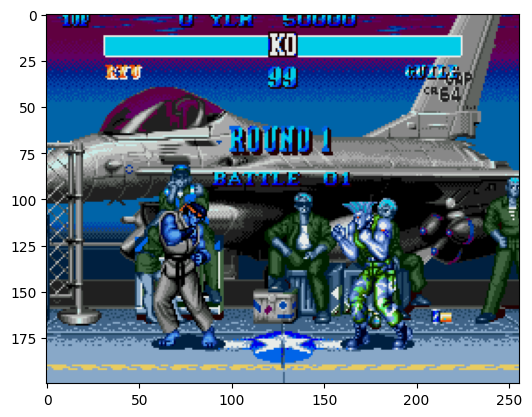

In [26]:
plt.imshow(cv2.cvtColor(obs, cv2.COLOR_BGR2RGB))

# Hyperparameter tune

In [27]:
! pip install torch==1.10.2+cu113 torchvision==0.11.3+cu113 torchaudio===0.10.2+cu113 -f https://download.pytorch.org/whl/cu113/torch_stable.html

Looking in links: https://download.pytorch.org/whl/cu113/torch_stable.html
  Using cached https://download.pytorch.org/whl/cu113/torch-1.10.2%2Bcu113-cp38-cp38-win_amd64.whl (2442.4 MB)
  Attempting uninstall: torch
    Found existing installation: torch 2.1.1
    Uninstalling torch-2.1.1:
      Successfully uninstalled torch-2.1.1


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
stable-baselines3 2.2.1 requires torch>=1.13, but you have torch 1.10.2+cu113 which is incompatible.


In [28]:
! pip install stable-baselines3[extra] optuna

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchaudio 0.10.2+cu113 requires torch==1.10.2, but you have torch 2.1.1 which is incompatible.
torchvision 0.11.3+cu113 requires torch==1.10.2, but you have torch 2.1.1 which is incompatible.



  Using cached torch-2.1.1-cp38-cp38-win_amd64.whl.metadata (26 kB)
Using cached torch-2.1.1-cp38-cp38-win_amd64.whl (192.3 MB)
  Attempting uninstall: torch
    Found existing installation: torch 1.10.2+cu113
    Uninstalling torch-1.10.2+cu113:
      Successfully uninstalled torch-1.10.2+cu113


In [29]:
# Importing the optimzation frame - HPO
import optuna
# PPO algo for RL
from stable_baselines3 import PPO
# Bring in the eval policy method for metric calculation
from stable_baselines3.common.evaluation import evaluate_policy
# Import the sb3 monitor for logging 
from stable_baselines3.common.monitor import Monitor
# Import the vec wrappers to vectorize and frame stack
from stable_baselines3.common.vec_env import DummyVecEnv, VecFrameStack
# Import os to deal with filepaths
import os

c:\Users\user\AppData\Local\Programs\Python\Python38\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [30]:
LOG_DIR = './logs/'
OPT_DIR = './opt/'

In [31]:
# Function to return test hyperparameters - define the object function
def optimize_ppo(trial): 
    return {
        'n_steps':trial.suggest_int('n_steps', 2048, 8192),
        'gamma':trial.suggest_loguniform('gamma', 0.8, 0.9999),
        'learning_rate':trial.suggest_loguniform('learning_rate', 1e-5, 1e-4),
        'clip_range':trial.suggest_uniform('clip_range', 0.1, 0.4),
        'gae_lambda':trial.suggest_uniform('gae_lambda', 0.8, 0.99)
    }

In [32]:
import os

SAVE_PATH = os.path.join(OPT_DIR, 'trial_{}_best_model'.format(1))

In [33]:
# Run a training loop and return mean reward 
def optimize_agent(trial):
    try:
        model_params = optimize_ppo(trial) 

        # Create environment 
        env = StreetFighter()
        env = Monitor(env, LOG_DIR)
        env = DummyVecEnv([lambda: env])
        env = VecFrameStack(env, 4, channels_order='last')

        # Create algo 
        model = PPO('CnnPolicy', env, tensorboard_log=LOG_DIR, verbose=0, **model_params)
        model.learn(total_timesteps=30000)
        #model.learn(total_timesteps=100000)

        # Evaluate model 
        mean_reward, _ = evaluate_policy(model, env, n_eval_episodes=5)
        env.close()

        SAVE_PATH = os.path.join(OPT_DIR, 'trial_{}_best_model'.format(trial.number))
        model.save(SAVE_PATH)

        return mean_reward

    except Exception as e:
        return -1000

In [34]:
import optuna

# Creating the experiment 
study = optuna.create_study(direction='maximize')
study.optimize(optimize_agent, n_trials=10, n_jobs=1)
#study.optimize(optimize_agent, n_trials=100, n_jobs=1)

[I 2023-12-07 10:46:08,607] A new study created in memory with name: no-name-d932a7a4-3243-44bb-a2c3-333f3932f470
C:\Users\user\AppData\Local\Temp\ipykernel_23880\3802630500.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma':trial.suggest_loguniform('gamma', 0.8, 0.9999),
C:\Users\user\AppData\Local\Temp\ipykernel_23880\3802630500.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate':trial.suggest_loguniform('learning_rate', 1e-5, 1e-4),
C:\Users\user\AppData\Local\Temp\ipykernel_23880\3802630500.py:7: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases

In [35]:
study.best_params

{'n_steps': 2276,
 'gamma': 0.946251487134582,
 'learning_rate': 1.2779699292505611e-05,
 'clip_range': 0.3818607042878128,
 'gae_lambda': 0.8514916202100361}

In [36]:
study.best_trial

FrozenTrial(number=0, state=TrialState.COMPLETE, values=[-1000.0], datetime_start=datetime.datetime(2023, 12, 7, 10, 46, 8, 609548), datetime_complete=datetime.datetime(2023, 12, 7, 10, 46, 8, 727380), params={'n_steps': 2276, 'gamma': 0.946251487134582, 'learning_rate': 1.2779699292505611e-05, 'clip_range': 0.3818607042878128, 'gae_lambda': 0.8514916202100361}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'n_steps': IntDistribution(high=8192, log=False, low=2048, step=1), 'gamma': FloatDistribution(high=0.9999, log=True, low=0.8, step=None), 'learning_rate': FloatDistribution(high=0.0001, log=True, low=1e-05, step=None), 'clip_range': FloatDistribution(high=0.4, log=False, low=0.1, step=None), 'gae_lambda': FloatDistribution(high=0.99, log=False, low=0.8, step=None)}, trial_id=0, value=None)

In [37]:
from stable_baselines3 import PPO
model = PPO.load(os.path.join(OPT_DIR, 'trial_24_best_model.zip'))


c:\Users\user\AppData\Local\Programs\Python\Python38\lib\site-packages\stable_baselines3\common\save_util.py:166: UserWarning: Could not deserialize object lr_schedule. Consider using `custom_objects` argument to replace this object.
Exception: an integer is required (got type bytes)
  warnings.warn(
c:\Users\user\AppData\Local\Programs\Python\Python38\lib\site-packages\stable_baselines3\common\save_util.py:166: UserWarning: Could not deserialize object clip_range. Consider using `custom_objects` argument to replace this object.
Exception: an integer is required (got type bytes)
  warnings.warn(
c:\Users\user\AppData\Local\Programs\Python\Python38\lib\site-packages\stable_baselines3\common\vec_env\patch_gym.py:95: UserWarning: You loaded a model that was trained using OpenAI Gym. We strongly recommend transitioning to Gymnasium by saving that model again.
  warnings.warn(
c:\Users\user\AppData\Local\Programs\Python\Python38\lib\site-packages\stable_baselines3\common\base_class.py:748: 

# Setup Callback

In [38]:
# Import base callback 
from stable_baselines3.common.callbacks import BaseCallback

In [39]:
class TrainAndLoggingCallback(BaseCallback):

    def __init__(self, check_freq, save_path, verbose=1):
        super(TrainAndLoggingCallback, self).__init__(verbose)
        self.check_freq = check_freq
        self.save_path = save_path

    def _init_callback(self):
        if self.save_path is not None:
            os.makedirs(self.save_path, exist_ok=True)

    def _on_step(self):
        if self.n_calls % self.check_freq == 0:
            model_path = os.path.join(self.save_path, 'best_model_{}'.format(self.n_calls))
            self.model.save(model_path)

        return True

In [40]:
CHECKPOINT_DIR = './train/'

In [41]:
callback = TrainAndLoggingCallback(check_freq=10000, save_path=CHECKPOINT_DIR)

# Train Model

In [42]:
env.close()

In [43]:
print("Before VecFrameStack:", env.observation_space)


Before VecFrameStack: Box(0, 255, (200, 256, 3), uint8)


In [44]:
import gym
from stable_baselines3.common.vec_env import VecFrameStack
from stable_baselines3.common.monitor import Monitor
from stable_baselines3.common.vec_env import DummyVecEnv

# Create environment
env = StreetFighter()  # Assuming StreetFighter is properly defined

# Wrap the environment with Monitor
env = Monitor(env, LOG_DIR)

# Wrap the environment with DummyVecEnv
env = DummyVecEnv([lambda: env])



c:\Users\user\AppData\Local\Programs\Python\Python38\lib\site-packages\gym\utils\seeding.py:159: DeprecationWarning: WARN: Function `hash_seed(seed, max_bytes)` is marked as deprecated and will be removed in the future. 
  deprecation(
c:\Users\user\AppData\Local\Programs\Python\Python38\lib\site-packages\gym\utils\seeding.py:203: DeprecationWarning: WARN: Function `_bigint_from_bytes(bytes)` is marked as deprecated and will be removed in the future. 
  deprecation(


In [45]:
import numpy as np

# Assuming your original observation space is Box(0, 255, (84, 84, 1), uint8)
# You can manually create an observation space with stacked frames
stacked_frames = 4
stacked_observation_space = Box(low=0, high=255, shape=(84, 84, 1 * stacked_frames), dtype=np.uint8)

# Assuming 'env' is your original environment
# Replace the observation space with the stacked version
env.observation_space = stacked_observation_space

# Now, in your step function, you need to update the observation accordingly
# Assuming 'obs' is the current observation from the environment
# 'obs' should be a single frame, and you need to stack it with the previous frames
stacked_obs = np.concatenate([obs] * stacked_frames, axis=-1)

# 'stacked_obs' can be used as the updated observation


In [46]:
import numpy as np

# Assuming your original observation space is Box(0, 255, (84, 84, 1), uint8)
original_observation_space = Box(low=0, high=255, shape=(84, 84, 1), dtype=np.uint8)

# Assuming 'env' is your original environment
print("Original Observation Space:", env.observation_space)

# Assuming you want to stack 4 frames
stacked_frames = 4
stacked_observation_space = Box(low=0, high=255, shape=(84, 84, 1 * stacked_frames), dtype=np.uint8)

# Replace the observation space with the stacked version
env.observation_space = stacked_observation_space
print("Updated Observation Space:", env.observation_space)

# Now, in your step function, you need to update the observation accordingly
# Assuming 'obs' is the current observation from the environment
# 'obs' should be a single frame, and you need to stack it with the previous frames
obs = np.random.randint(0, 256, size=(84, 84, 1), dtype=np.uint8)  # Replace this with your actual observation

# Print the original observation
print("Original Observation:", obs)

# Stack the frames
stacked_obs = np.concatenate([obs] * stacked_frames, axis=-1)

# Print the stacked observation
print("Stacked Observation:", stacked_obs)


Original Observation Space: Box(0, 255, (84, 84, 4), uint8)
Updated Observation Space: Box(0, 255, (84, 84, 4), uint8)
Original Observation: [[[153]
  [188]
  [168]
  ...
  [ 71]
  [105]
  [ 42]]

 [[ 91]
  [239]
  [179]
  ...
  [ 50]
  [ 84]
  [ 20]]

 [[113]
  [255]
  [156]
  ...
  [223]
  [ 71]
  [217]]

 ...

 [[ 41]
  [145]
  [ 83]
  ...
  [250]
  [129]
  [157]]

 [[236]
  [ 87]
  [ 13]
  ...
  [ 32]
  [ 83]
  [188]]

 [[245]
  [176]
  [155]
  ...
  [206]
  [177]
  [ 19]]]
Stacked Observation: [[[153 153 153 153]
  [188 188 188 188]
  [168 168 168 168]
  ...
  [ 71  71  71  71]
  [105 105 105 105]
  [ 42  42  42  42]]

 [[ 91  91  91  91]
  [239 239 239 239]
  [179 179 179 179]
  ...
  [ 50  50  50  50]
  [ 84  84  84  84]
  [ 20  20  20  20]]

 [[113 113 113 113]
  [255 255 255 255]
  [156 156 156 156]
  ...
  [223 223 223 223]
  [ 71  71  71  71]
  [217 217 217 217]]

 ...

 [[ 41  41  41  41]
  [145 145 145 145]
  [ 83  83  83  83]
  ...
  [250 250 250 250]
  [129 129 129 129]


In [47]:

model_params = study.best_params


In [48]:
model_params['n_steps'] = 7488


In [49]:
model_params


{'n_steps': 7488,
 'gamma': 0.946251487134582,
 'learning_rate': 1.2779699292505611e-05,
 'clip_range': 0.3818607042878128,
 'gae_lambda': 0.8514916202100361}

In [50]:
from gym import spaces

# Define a Discrete action space with 12 actions
action_space = spaces.Discrete(12)

In [51]:
env.close()

In [91]:
model = PPO('CnnPolicy', env, tensorboard_log=LOG_DIR, verbose=1, **model_params)


Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Wrapping the env in a VecTransposeImage.


In [92]:
import os

# List the contents of the 'opt' directory
print(os.listdir(OPT_DIR))


['trial_24_best_model.zip']


In [94]:
import os

# List the contents of the 'opt' directory
opt_files = os.listdir(OPT_DIR)
print(opt_files)


['trial_24_best_model.zip']


In [96]:
model.load(os.path.join(OPT_DIR, 'trial_24_best_model.zip'))


model.learn(total_timesteps=1000, callback=callback)



Logging to ./logs/PPO_2
-----------------------------
| time/              |      |
|    fps             | 102  |
|    iterations      | 1    |
|    time_elapsed    | 72   |
|    total_timesteps | 7488 |
-----------------------------


In [97]:
# Import the necessary libraries
from gym import Env
from gym.spaces import MultiBinary, Box
import numpy as np
import cv2
import retro
# Create custom environment 
class StreetFighter(Env): 
    def __init__(self, skip_frames=4):
        super().__init__()
        # Specify action space and observation space 
        self.observation_space = Box(low=0, high=255, shape=(84, 84, 1), dtype=np.uint8)
        self.action_space = MultiBinary(12)
        # Startup and instance of the game 
        self.game = retro.make(game='StreetFighterIISpecialChampionEdition-Genesis', use_restricted_actions=retro.Actions.FILTERED)
         # Specify the frame skipping value
        self.skip_frames = skip_frames
        self.current_frame = 0

    def reset(self):
        # Return the first frame 
        obs = self.game.reset()
        obs = self.preprocess(obs) 
        self.previous_frame = obs 
        
        # Create a attribute to hold the score delta 
        self.score = 0 
        return obs
    
    def preprocess(self, observation): 
        # Grayscaling 
        gray = cv2.cvtColor(observation, cv2.COLOR_BGR2GRAY)
        # Resize 
        resize = cv2.resize(gray, (84,84), interpolation=cv2.INTER_CUBIC)
        # Add the channels value
        channels = np.reshape(resize, (84,84,1))
        return channels 
    
    def step(self, action): 
        # Take a step 
        total_reward = 0
        for _ in range(self.skip_frames):
            obs, reward, done, info = self.game.step(action)
            total_reward += reward
            self.current_frame += 1
            if done:
                break

        obs = self.preprocess(obs) 
        frame_delta = obs - self.previous_frame
        self.previous_frame = obs 

        reward = info['score'] - self.score 
        self.score = info['score'] 

        return frame_delta, total_reward, done, info
        
    
    def render(self, *args, **kwargs):
        self.game.render()
        
    def close(self):
        self.game.close()


In [144]:
env.close()

# Evaluate the Model

In [161]:
import numpy as np
from stable_baselines3.common.evaluation import evaluate_policy

# Replace 'StreetFighter()' with your environment instantiation
env = StreetFighter()

# Load the trained PPO model
model = PPO.load('./opt/trial_24_best_model.zip')

# Wrap the environment with VecFrameStack
env = DummyVecEnv([lambda: env])
env = VecFrameStack(env, 4, channels_order='last')

# Evaluate the model
mean_reward, std_reward = evaluate_policy(model, env, n_eval_episodes=10)

# Print the results
print(f"Mean reward: {mean_reward:.2f} +/- {std_reward:.2f}")


Mean reward: 26800.00 +/- 0.00


In [120]:
#env.close()

In [162]:
model = PPO.load('./opt/trial_24_best_model.zip')

In [163]:
mean_reward, _ = evaluate_policy(model, env, render=True, n_eval_episodes=1)

In [164]:
mean_reward

26800.0

In [71]:
#env.close()

# Test out the Model

In [165]:
obs = env.reset()

In [166]:
obs.shape

(1, 84, 84, 4)

In [167]:
env.step(model.predict(obs)[0])

(array([[[[  0,   0,  36,   0],
          [  0,   0,  36,   0],
          [  0,   0,  33,   0],
          ...,
          [  0,   0,  37,   0],
          [  0,   0,  34,   0],
          [  0,   0,  36,   0]],
 
         [[  0,   0,  36,   0],
          [  0,   0,  36,   0],
          [  0,   0,  35,   0],
          ...,
          [  0,   0,  36,   0],
          [  0,   0,  40,   0],
          [  0,   0,  40,   0]],
 
         [[  0,   0,  36,   0],
          [  0,   0,  36,   0],
          [  0,   0,  36,   0],
          ...,
          [  0,   0,  36,   0],
          [  0,   0,  36,   0],
          [  0,   0,  36,   0]],
 
         ...,
 
         [[  0,   0, 162,   0],
          [  0,   0, 159,   0],
          [  0,   0, 159,   0],
          ...,
          [  0,   0, 159,   0],
          [  0,   0, 159,   0],
          [  0,   0, 159,   0]],
 
         [[  0,   0, 162,   0],
          [  0,   0, 162,   0],
          [  0,   0, 162,   0],
          ...,
          [  0,   0, 162,   0],
 

In [168]:
# Reset game to starting state
obs = env.reset()
# Set flag to flase
done = False
for game in range(1): 
    while not done: 
        if done: 
            obs = env.reset()
        env.render()
        action = model.predict(obs)[0]
        obs, reward, done, info = env.step(action)
        time.sleep(0.01)
        print(reward)

[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]


In [159]:
env.close()